# Data exploration

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

DATA_COLLECTED_AT = datetime(2025, 9, 21).date()
NOTEBOOK_DIR = Path.cwd()
DATA_DIR = NOTEBOOK_DIR / "../datasets/customer_purchases"

def read_csv(filename: str):
    file = DATA_DIR / f"{filename}.csv"
    df = pd.read_csv(file)
    return df

train_df = read_csv("customer_purchases_train")
test_df = read_csv("customer_purchases_test")

In [67]:
# Información general sobre el train dataset

print(train_df.shape)
print(train_df.info())

(7289, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_id             7289 non-null   int64  
 1   customer_id             7289 non-null   object 
 2   customer_date_of_birth  7289 non-null   object 
 3   customer_gender         5738 non-null   object 
 4   customer_signup_date    7289 non-null   object 
 5   item_id                 7289 non-null   object 
 6   item_title              7289 non-null   object 
 7   item_category           7289 non-null   object 
 8   item_price              7289 non-null   float64
 9   item_img_filename       7289 non-null   object 
 10  item_avg_rating         7244 non-null   float64
 11  item_num_ratings        7289 non-null   int64  
 12  item_release_date       7289 non-null   object 
 13  purchase_timestamp      7289 non-null   object 
 14  customer_item_views     7289 

In [68]:
# Información general sobre el test dataset

print(test_df.shape)
print(test_df.info())

(978, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_id             978 non-null    int64  
 1   customer_id             978 non-null    object 
 2   customer_date_of_birth  978 non-null    object 
 3   customer_gender         800 non-null    object 
 4   customer_signup_date    978 non-null    object 
 5   item_id                 978 non-null    object 
 6   item_title              978 non-null    object 
 7   item_category           978 non-null    object 
 8   item_price              978 non-null    float64
 9   item_img_filename       978 non-null    object 
 10  item_avg_rating         0 non-null      float64
 11  item_num_ratings        0 non-null      float64
 12  item_release_date       978 non-null    object 
 13  purchase_timestamp      0 non-null      float64
 14  customer_item_views     0 non-nu

---

## Observaciones Sobre Train Dataset

- 🎯 **Se identifica la columna a predecir**: `label`
    - En todos los registros es igual a $1$
        - Evidencía que el cliente compró el producto
    - No se incluyen casos donde **no se hizo la compra** (porque son compras históricas)
        - Se tendrá que aumentar el dataset creando esos registros
- ❌ **Columna**: `purchase_id`
    - Identificador de compra es irrelevante para predecir futuras compras
    - No usar para entrenar el modelo
- ✅ **Columna de interés**: `customer_id`
    - Identifica al cliente que hizo la compra
    - Permite identificar gustos y patrones del cliente para predecir si comprará un nuevo producto, y la certeza
- ✅ **Columna de interés**: `customer_date_of_birth`
    - ⭐ Permite calcular **edad del cliente**
    - 🔎 Investigar existencia de relación entre **edad** con sus **gustos** e **intereses**
- ✅ **Columna de interés**: `customer_gender`
    - 🔎 Investigar existencia de relación entre **género** del cliente con sus **gustos** e **intereses**
- ✅ **Columna de interés**: `customer_signup_date`
    - ⭐ Permite calcular la **antigüedad del cliente**
- ❓ **Columna**: `item_id`
    - Quizá este dato no nos interesa para entrenamiento ya que los de validación serán productos inexistentes
    - Nos interesan los atributos que describen al artículo comprado y a quién lo compró en lugar de qué artículo específicamente fue comprado.
- ✅ **Columna de interés**: `item_title`
    - Muchas palabras
        - Encontrar manera de extraer las importantes (o la importante)
    - Da una descripción sobre el artículo. 
    - Nos interesan algunos adjetivos que sobresalen de ahí para poder relacionar sobre los segmentos de clientes y la ropa que compra para poder saber la probabilidad de que compre el nuevo artículo.
        - Casual
        - Elegante
        - Stylish
         Modern
        - ...
- ✅ **Columna de interés**: `item_category`
    - Una sola palabra que describe si es vestido, blusa, traje, etc.
- ✅ **Columna de interés**: `item_price`
    - 🔎 Puede que si es muy caro no sea muy comprado
- ✅ **Columna de interés**: `item_img_filename`
    - Las imagenes, son el color de la ropa, es categórico.
    - Innecesario procesar imagenes
- ❓ **Demás columnas**
    - **Información probablemente inútil**
    - Se encuentran los ratings e información derivada de la compra de artículos ya existentes.
        - `item_avg_rating`
        - `item_num_ratings`
        - `item_release_date`
        - `purchase_timestamp`
        - `customer_item_views`
        - `purchase_item_rating`
        - `purchase_device`
    - Dudo que sea información útil para predecir la compra.
        - Necesitan compras existentes para existir, por lo tanto, probablemente desechables
- ⚠️ **Columnas con datos parciales**:
    - `customer_gender`
    - `item_avg_rating`
    - `purchase_item_rating`

---

## Observaciones Sobre Test Dataset

- Son datos de productos **no lanzados**
    - Lanzamiento después de corte (9/21/2025)
- ⚠️ **Columna inexistente**: `label`
    - ❗ Será necesario hacer **split del train dataset**, que sí tiene labels, para poder validar el funcionamiento del modelo
- ⚠️ **Registros vaciós**: `customer_gender`
    - Es la única columna con datos parciales en validación
- Las mismas columnas que se identificaron como probablemente inutiles en training están vacias excepto `item_release_date`. Están son:
    - `item_avg_rating`
    - `item_num_ratings`
    - `purchase_timestamp`
    - `customer_item_views`
    - `purchase_item_rating`
    - `purchase_device`


---

# Distribuciones de datos


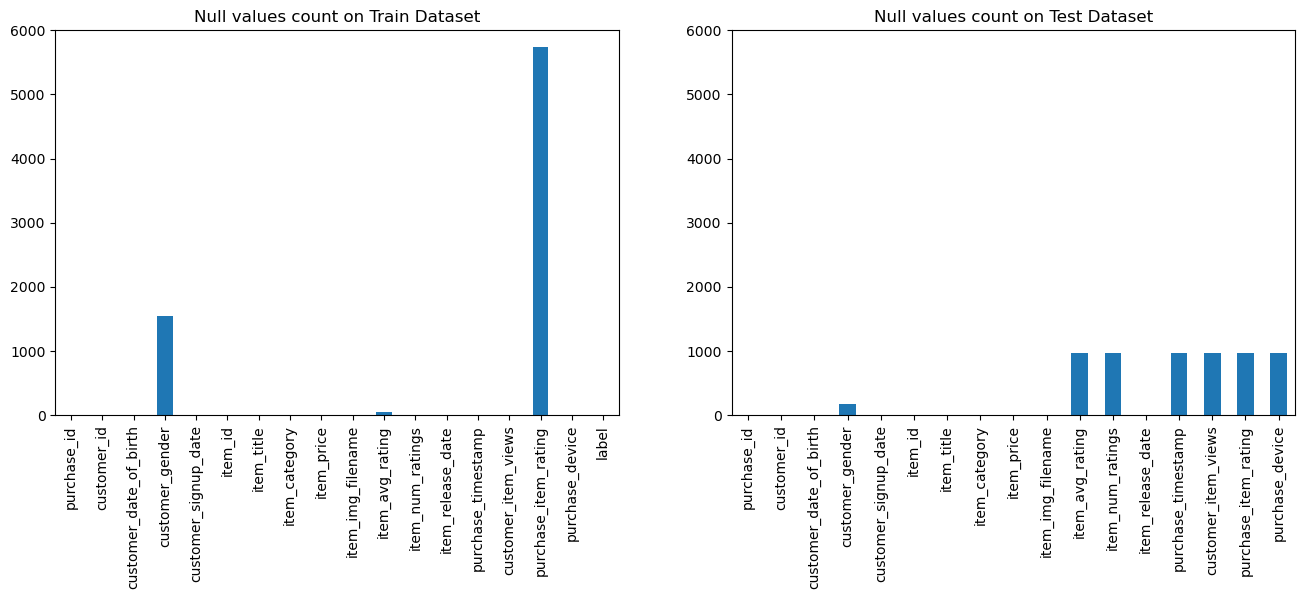

In [69]:
# visualizar valores vacios

train_null_count = train_df.isnull().sum()
test_null_count = test_df.isnull().sum()

fig, axes = plt.subplots(1, 2, figsize=(8*2, 5))

train_null_count.plot(
    kind='bar',
    ax=axes[0],
    ylim=(0, 6000),
    title="Null values count on Train Dataset"
);

test_null_count.plot(
    kind='bar',
    ax=axes[1],
    ylim=(0,6000),
    title="Null values count on Test Dataset"
);

In [70]:
# grafica que agrupa los costos y grafica el rango de precios que tiene mas ventas

# total de clientes, dividir en segmentos de edad y graficar frecuencia

# compras populares entre hombres y mujeres

# compras populares entre segmentos de clientes ????

# top 10 clientes con mas compras

# cantidad de compras a traves del tiempo
#



In [71]:
print(train_df.columns)

Index(['purchase_id', 'customer_id', 'customer_date_of_birth',
       'customer_gender', 'customer_signup_date', 'item_id', 'item_title',
       'item_category', 'item_price', 'item_img_filename', 'item_avg_rating',
       'item_num_ratings', 'item_release_date', 'purchase_timestamp',
       'customer_item_views', 'purchase_item_rating', 'purchase_device',
       'label'],
      dtype='object')



Primera gráfica:
Muestra la cantidad de ventas para cada precio específico.
Sirve para identificar precios populares o menos vendidos.

Segunda gráfica:
Muestra la cantidad de ventas agrupadas por rangos de precios.
Permite ver en qué rango de precios se venden más productos, útil para análisis de segmentos de mercado y estrategias de precios.

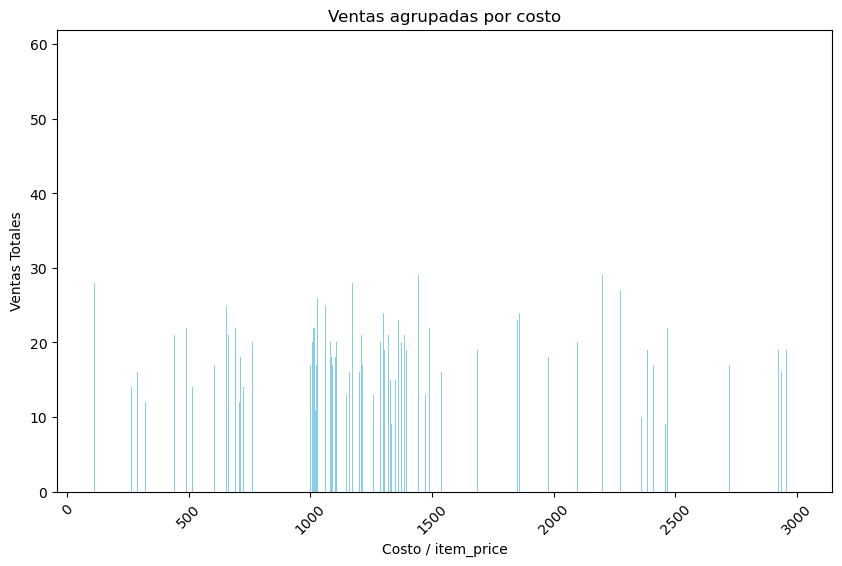

C:\Users\gusta\AppData\Local\Temp\ipykernel_17180\830630251.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_summary = train_df.groupby(price_bins)["label"].sum().reset_index()


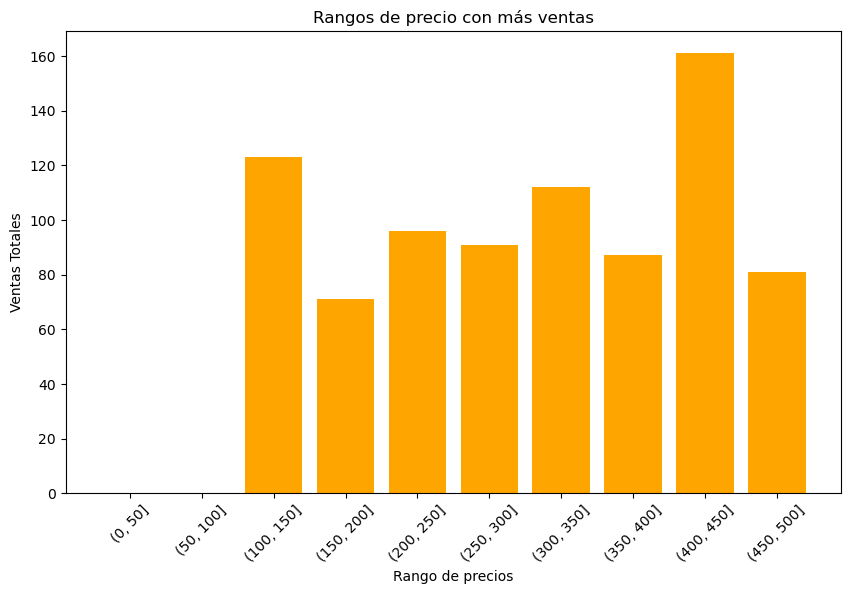

In [72]:
# grafica que agrupa los costos y grafica el rango de precios que tiene mas ventas
import pandas as pd
import matplotlib.pyplot as plt

# Agrupa por precio y suma el label (número de compras por precio)
cost_summary = train_df.groupby("item_price")["label"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(cost_summary["item_price"], cost_summary["label"], color="skyblue")
plt.title("Ventas agrupadas por costo")
plt.xlabel("Costo / item_price")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45)
plt.show()

# Gráfico de rangos de precios
price_bins = pd.cut(train_df["item_price"], bins=range(0, 501, 50))
range_summary = train_df.groupby(price_bins)["label"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(range_summary["item_price"].astype(str), range_summary["label"], color="orange")
plt.title("Rangos de precio con más ventas")
plt.xlabel("Rango de precios")
plt.ylabel("Ventas Totales")
plt.xticks(rotation=45)
plt.show()



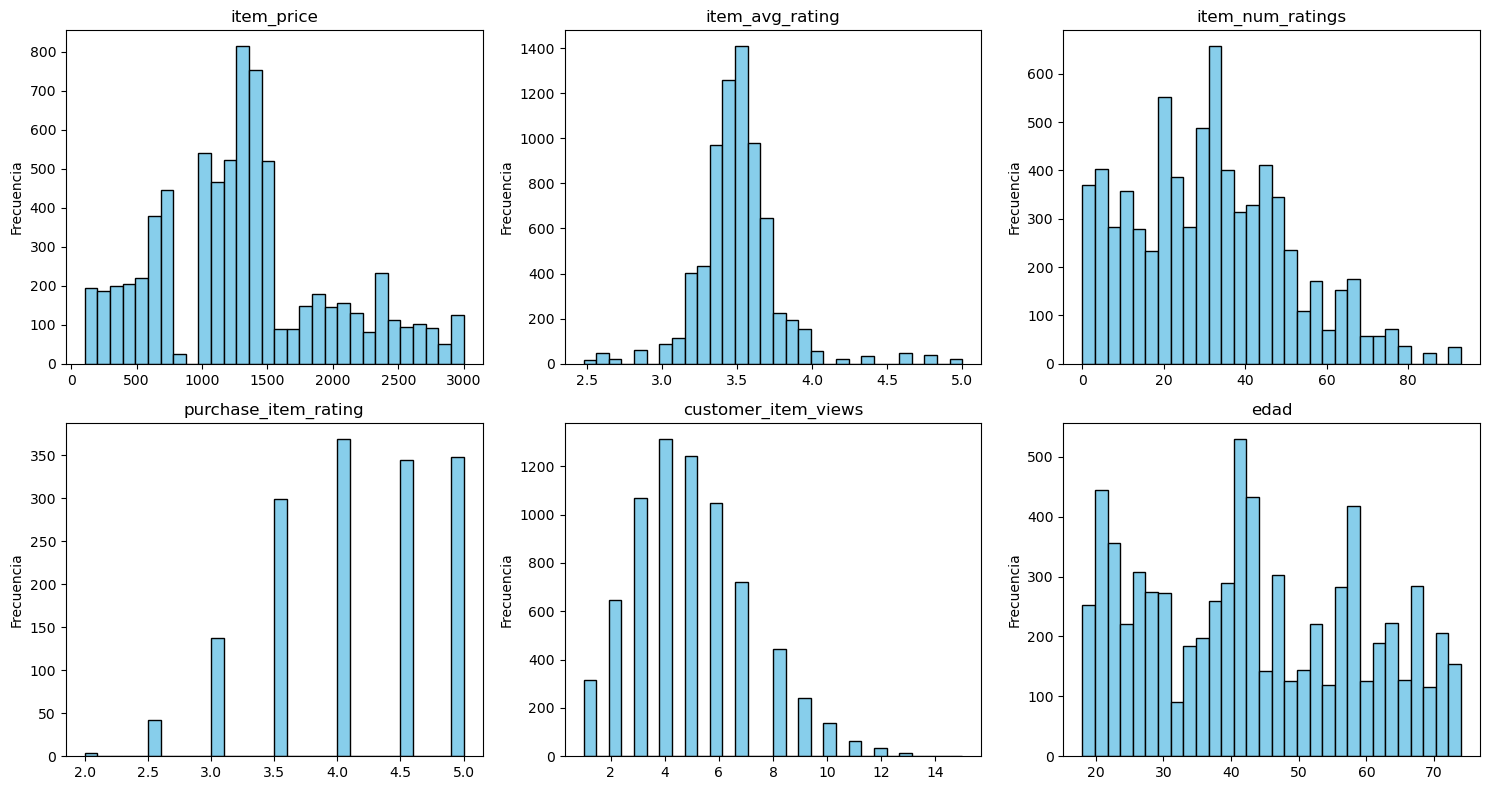

In [ ]:
import matplotlib.pyplot as plt

# Selecciona las columnas numéricas/categóricas que quieres graficar
cols = [
    "item_price", "item_avg_rating", "item_num_ratings", "purchase_item_rating", 
    "customer_item_views", "edad"
]

# Calcula la edad si no existe
if "edad" not in train_df.columns:
    today = pd.Timestamp("2025-09-21")
    train_df["customer_date_of_birth"] = pd.to_datetime(train_df["customer_date_of_birth"], errors="coerce")
    train_df["edad"] = (today - train_df["customer_date_of_birth"]).dt.days // 365

# Número de columnas y filas para la cuadrícula
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

for i, col in enumerate(cols):
    ax = axes[i // n_cols, i % n_cols]
    train_df[col].dropna().plot(kind="hist", bins=30, ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

# Elimina ejes vacíos si hay (Recorre los subplots que no se usaron. Los elimina para que no aparezcan cuadros vacíos en la figura final.)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()